## Bibliotecas Utilizadas

In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras import backend as K
from keras.preprocessing.image import img_to_array, load_img
from datetime import datetime, time

In [27]:
print ("Início Execução : ")
print (datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

Início Execução : 
2021-07-19 00:10:28


# Funções

In [28]:
def build_grayscale_image(image):
    image = tf.image.convert_image_dtype(image , tf.float32)
    return tf.image.rgb_to_grayscale(image)

In [29]:
def build_hsv_grayscale_image(image):
    image = tf.image.convert_image_dtype(image , tf.float32)
    gray_image = tf.image.rgb_to_grayscale(image)
    image = tf.image.rgb_to_hsv(image)
    rez = tf.concat([image , gray_image], 2)
    return rez

In [30]:
def get_dados(path, size):
    lista_dir = os.listdir(path)
    X = []
    Y = []
    for cat_fruta, fruta in enumerate(lista_dir):
        if(cat_fruta == 10):
            break
        lista_img = os.listdir('{0}/{1}'.format(path, fruta))
        print('{0} - {1}'.format(cat_fruta, fruta))
        for img in lista_img:
            arquivo = '{0}/{1}/{2}'.format(path, fruta, img)
            img_fruta = img_to_array(load_img(arquivo, target_size=(size, size)))
            X.append(img_fruta)
            Y.append(cat_fruta)
    return (X, Y)

In [31]:
def get_dados_grayscale(path, size):
    lista_dir = os.listdir(path)
    X = []
    Y = []
    for cat_fruta, fruta in enumerate(lista_dir):
        if(cat_fruta == 10):
            break
        lista_img = os.listdir('{0}/{1}'.format(path, fruta))
        print('{0} - {1}'.format(cat_fruta, fruta))
        for img in lista_img:
            arquivo = '{0}/{1}/{2}'.format(path, fruta, img)
            img_fruta = build_grayscale_image(img_to_array(load_img(arquivo, target_size=(size, size))))
            X.append(img_fruta)
            Y.append(cat_fruta)
    return (X, Y)

In [32]:
def get_dados_hsv_grayscale(path, size):
    lista_dir = os.listdir(path)
    X = []
    Y = []
    for cat_fruta, fruta in enumerate(lista_dir):
        if(cat_fruta == 10):
            break        
        lista_img = os.listdir('{0}/{1}'.format(path, fruta))
        print('{0} - {1}'.format(cat_fruta, fruta))
        for img in lista_img:
            arquivo = '{0}/{1}/{2}'.format(path, fruta, img)
            img_fruta = build_hsv_grayscale_image(img_to_array(load_img(arquivo, target_size=(size, size))))
            X.append(img_fruta)
            Y.append(cat_fruta)
    return (X, Y)

In [33]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Accuracy')
    plt.plot(x, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and validation Accuracy')
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [34]:
def CNN_PaperOriginal(num_frutas, size, camadas):
    # Cria o modelo
    model = Sequential()
    
    #Convolução 2D com função de ativação Rectified Linear Units 32 kernels/Pesos (filtros) 
    model.add(Conv2D(4, (5, 5), input_shape=(size, size, camadas), activation='relu'))#
    print( model.output_shape)
    #Camada de Pooling 	    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    print(model.output_shape)
    
    model.add(Dropout(0.2))

    model.add(Conv2D(16, (5, 5), activation='relu'))#
    print(model.output_shape)
    #Camada de Pooling 	    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    print(model.output_shape)
    
    model.add(Dropout(0.2))
    
    model.add(Conv2D(32, (5, 5), activation='relu'))#
    print(model.output_shape)
    #Camada de Pooling 	    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    print(model.output_shape)
    
    model.add(Dropout(0.2))
    
    model.add(Conv2D(64, (5, 5), activation='relu'))#
    print(model.output_shape)
    #Camada de Pooling 	    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    print(model.output_shape)
    
    model.add(Dropout(0.2))
    
    #Converte o conjunto de imagens e um vetor unidimensional para a entrada da rede neural totalmente conectada
    model.add(Flatten())
    print(model.output_shape)
    model.add(Dense(1024, activation='tanh'))
    print(model.output_shape)
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='tanh'))
    print(model.output_shape)
    model.add(Dropout(0.2))
    model.add(Dense(60, activation='tanh'))
    print(model.output_shape)
    model.add(Dropout(0.2))
    #Função de Ativação Softmax
    model.add(Dense(num_frutas, activation='softmax'))
    print(model.output_shape)
    return model

In [35]:
def CNN_LeNet5(num_frutas,size, camadas):
    # Cria o modelo
    model = Sequential()
    #Convolução 2D com função de ativação Rectified Linear Units 32 kernels/Pesos (filtros) 
    model.add(Conv2D(6, (5, 5), input_shape=(size, size, camadas), activation='relu'))#
    print( model.output_shape)
    #Camada de Pooling 	    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    print( model.output_shape)
    
    model.add(Dropout(0.2))

    model.add(Conv2D(16, (5, 5), activation='relu'))#
    print( model.output_shape)
    #Camada de Pooling 	    
    model.add(MaxPooling2D(pool_size=(2, 2)))
    print( model.output_shape)
    
    model.add(Dropout(0.2))

    #Converte o conjunto de imagens e um vetor unidimensional para a entrada da rede neural totalmente conectada
    model.add(Flatten())
    print(model.output_shape)
    model.add(Dense(240, activation='tanh'))
    print(model.output_shape)
    model.add(Dropout(0.2))    
    model.add(Dense(120, activation='tanh'))
    print(model.output_shape)
    model.add(Dropout(0.2))    
    #Função de Ativação Softmax
    model.add(Dense(num_frutas, activation='softmax'))
    print(model.output_shape)
    return model

In [36]:
def CNN_AlexNet(num_frutas,size,camadas):
    # Cria o modelo
    model = Sequential()
    #Convolução 2D com função de ativação Rectified Linear Units 32 kernels/Pesos (filtros) 
    model.add(Conv2D(96, (11, 11), input_shape=(size, size, camadas), activation='relu'))#
    print(model.output_shape)
    #Camada de Pooling 	    
    model.add(MaxPooling2D(pool_size=(3, 3)))
    print(model.output_shape)
    
    model.add(Dropout(0.2))

    model.add(Conv2D(256, (5, 5), activation='relu'))#
    print(model.output_shape)
    #Camada de Pooling 	    
    model.add(MaxPooling2D(pool_size=(3, 3)))
    print(model.output_shape)
    
    model.add(Dropout(0.2))

    model.add(Conv2D(384, (3, 3), activation='relu'))#
    print(model.output_shape)
    model.add(Dropout(0.2))

    model.add(Conv2D(384, (3, 3), activation='relu'))#
    print(model.output_shape)
    model.add(Dropout(0.2))

    model.add(Conv2D(256, (3, 3), activation='relu'))#
    print(model.output_shape)
    model.add(Dropout(0.2))

    #Converte o conjunto de imagens e um vetor unidimensional para a entrada da rede neural totalmente conectada
    model.add(Flatten())
    print(model.output_shape)
    model.add(Dense(4096, activation='relu'))
    print(model.output_shape)
    model.add(Dropout(0.2))
    model.add(Dense(4096, activation='relu'))
    print(model.output_shape)
    model.add(Dropout(0.2))
    #Função de Ativação Softmax
    model.add(Dense(num_frutas, activation='softmax'))
    print(model.output_shape)
    return model

# Rodando Algoritmos

In [37]:
path_treino = './fruits-15/Training' 
path_teste = './fruits-15/Test'

In [38]:
X_frutas, Y_frutas = get_dados(path_treino, 100)
X_train = np.asarray(X_frutas).astype(np.float32)
Y_train = np.asarray(Y_frutas)
X_train = X_train.astype('float32')/255
num_frutas = len(list(set(Y_train)))
print(num_frutas)
Y_train = to_categorical(Y_train, num_frutas)

0 - Apple Red 1
1 - Banana
2 - Blueberry
3 - Cherry 2
4 - Grape Blue
5 - Kiwi
6 - Lemon
7 - Mango
8 - Maracuja
9 - Orange
10


In [39]:
model = CNN_PaperOriginal(num_frutas,100,3)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, validation_split = 0.2, epochs=20, batch_size=120)
plot_history(history)
scores = model.evaluate(X_train, Y_train, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurácia da CNN: %.2f%%" % (scores[1]*100))

(None, 96, 96, 4)
(None, 48, 48, 4)
(None, 44, 44, 16)
(None, 22, 22, 16)
(None, 18, 18, 32)
(None, 9, 9, 32)
(None, 5, 5, 64)
(None, 2, 2, 64)
(None, 256)
(None, 1024)
(None, 256)
(None, 60)
(None, 10)
Train on 4466 samples, validate on 1117 samples
Epoch 1/20


ResourceExhaustedError:  OOM when allocating tensor with shape[120,4,96,96] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node conv2d_14/convolution (defined at D:\FIAP\Anaconda3\envs\tensorflow\lib\site-packages\keras\backend\tensorflow_backend.py:3009) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_keras_scratch_graph_251665]

Function call stack:
keras_scratch_graph


In [15]:
X_frutas, Y_frutas = get_dados(path_teste, 100)
X_test = np.asarray(X_frutas).astype(np.float32)
Y_test = np.asarray(Y_frutas)
X_test = X_test.astype('float32')/255
Y_test = to_categorical(Y_test, num_frutas)
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurária da CNN: %.2f%%" % (scores[1]*100))

0 - Apple Red 1
1 - Banana
2 - Blueberry
3 - Cherry 2
4 - Grape Blue
Erro da CNN: 3.02%
Acurária da CNN: 96.98%


# Gray Scale

In [20]:
X_frutas, Y_frutas = get_dados_grayscale(path_treino, 28)
X_train_grayscale = np.asarray(X_frutas).astype(np.float32)
Y_train_grayscale = np.asarray(Y_frutas)
X_train_grayscale = X_train_grayscale.astype('float32')/255
num_frutas = len(list(set(Y_train_grayscale)))
print(num_frutas)
Y_train_grayscale = to_categorical(Y_train_grayscale, num_frutas)

0 - Apple Red 1
1 - Banana
2 - Blueberry
3 - Cherry 2
4 - Grape Blue
5


(None, 24, 24, 6)
(None, 12, 12, 6)
(None, 8, 8, 16)
(None, 4, 4, 16)
(None, 256)
(None, 240)
(None, 120)
(None, 5)
Train on 2532 samples, validate on 634 samples
Epoch 1/10
2532/2532 [==============================] - 1s 402us/step - loss: 0.8039 - accuracy: 0.6817 - val_loss: 0.8079 - val_accuracy: 0.4322
Epoch 2/10
2532/2532 [==============================] - 0s 130us/step - loss: 0.2246 - accuracy: 0.9198 - val_loss: 0.7143 - val_accuracy: 0.5521
Epoch 3/10
2532/2532 [==============================] - 0s 126us/step - loss: 0.1102 - accuracy: 0.9668 - val_loss: 0.4782 - val_accuracy: 0.8186
Epoch 4/10
2532/2532 [==============================] - 0s 129us/step - loss: 0.0637 - accuracy: 0.9818 - val_loss: 0.4127 - val_accuracy: 0.8612
Epoch 5/10
2532/2532 [==============================] - 0s 127us/step - loss: 0.0515 - accuracy: 0.9846 - val_loss: 0.6614 - val_accuracy: 0.6877
Epoch 6/10
2532/2532 [==============================] - 0s 128us/step - loss: 0.0314 - accuracy: 0.9929 - v

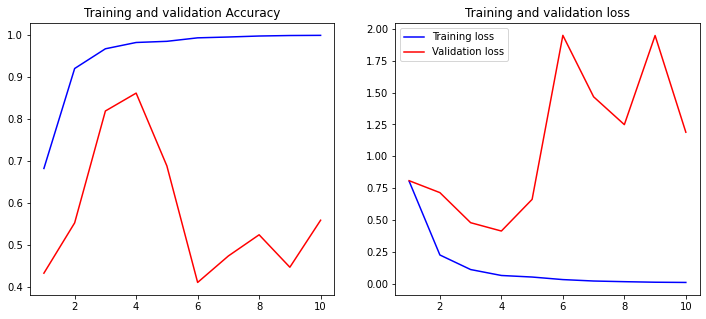

In [21]:
model = CNN_LeNet5(num_frutas,28,1)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train_grayscale, Y_train_grayscale, validation_split = 0.2, epochs=20, batch_size=120)
plot_history(history)
scores = model.evaluate(X_train_grayscale, Y_train_grayscale, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurácia da CNN: %.2f%%" % (scores[1]*100))

In [22]:
X_frutas, Y_frutas = get_dados_grayscale(path_teste, 28)
X_test_grayscale = np.asarray(X_frutas).astype(np.float32)
Y_test_grayscale = np.asarray(Y_frutas)
X_test_grayscale = X_test_grayscale.astype('float32')/255
Y_test_grayscale = to_categorical(Y_test_grayscale, num_frutas)
scores = model.evaluate(X_test_grayscale, Y_test_grayscale, verbose=0)
print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
print("Acurária da CNN: %.2f%%" % (scores[1]*100))

0 - Apple Red 1
1 - Banana
2 - Blueberry
3 - Cherry 2
4 - Grape Blue
Erro da CNN: 12.19%
Acurária da CNN: 87.81%


In [ ]:
print ("Fim Execução : ")
print (datetime.now().strftime("%Y-%m-%d %H:%M:%S"))

# HSV_GrayScale

In [ ]:
#X_frutas, Y_frutas = get_dados_hsv_grayscale(path_treino, 224)
#X_train_hsv_grayscale = np.asarray(X_frutas).astype(np.float32)
#Y_train_hsv_grayscale = np.asarray(Y_frutas)
#X_train_hsv_grayscale = X_train_hsv_grayscale.astype('float32')/255
#num_frutas = len(list(set(Y_train_hsv_grayscale)))
#print(num_frutas)
#Y_train = to_categorical(Y_train_hsv_grayscale, num_frutas)

#model = CNN_AlexNet(num_frutas,224,4)
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#history = model.fit(X_train, Y_train, validation_split = 0.2, epochs=10, batch_size=60)
#plot_history(history)
#scores = model.evaluate(X_train, Y_train, verbose=0)
#print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
#print("Acurácia da CNN: %.2f%%" % (scores[1]*100))

In [ ]:
#X_frutas, Y_frutas = get_dados_hsv_grayscale(path_teste, 28)
#X_test_hsv_grayscale = np.asarray(X_frutas).astype(np.float32)
#Y_test_hsv_grayscale = np.asarray(Y_frutas)
#X_test_hsv_grayscale = X_test_hsv_grayscale.astype('float32')/255
#Y_test_hsv_grayscale = to_categorical(Y_test_hsv_grayscale, num_frutas)
#scores = model.evaluate(X_test_hsv_grayscale, Y_test_hsv_grayscale, verbose=0)
#print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
#print("Acurária da CNN: %.2f%%" % (scores[1]*100))